In [1]:
# Import all libraries to be used
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the csv file and check column names
df = pd.read_csv('loan.csv',low_memory=False)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Start Data Cleanup

In [3]:
#As we know that loan_status = "current" should not be analysed hence removing all rows with Current
df_noncurrent = df[(df['loan_status']) != "Current"]
#We will only get data with noncurrent records
df_noncurrent.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

In [4]:
#Now drop all the columns which are having NA as all values or same values - checked with filter in excel
#Column application type is having same value "individual", others are with value NA,0,1
df_noncurrent.drop(['application_type','annual_inc_joint','dti_joint',
                    'verification_status_joint','acc_now_delinq','tot_coll_amt',
                   'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
                   'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
                   'max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
                   'inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
                   'bc_util','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op',
                   'mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
                   'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
                   'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats',
                   'num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0',
                   'num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
                   'pct_tl_nvr_dlq','percent_bc_gt_75','policy_code','mths_since_last_major_derog'
                   ], inplace = True, axis=1)



C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\965415784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['application_type','annual_inc_joint','dti_joint',


In [5]:
#Drop some more columns with non valuable data or same data
df_noncurrent.drop(['out_prncp','initial_list_status','out_prncp_inv'
                   ], inplace = True, axis=1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1757676111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['out_prncp','initial_list_status','out_prncp_inv'


In [6]:
# check remaining columns
df_noncurrent.shape

(38577, 54)

In [7]:
#Columns having customer behaviour vlaues, which will no longer add any input.Customer behaviours will only be determined after giving loan
# and surely this data is not valuable before giving loan and to analyse it for loan eligibility identifiers
df_noncurrent.drop(['earliest_cr_line','inq_last_6mths','open_acc','pub_rec',
                    'revol_bal','total_acc','total_pymnt'
                    ,'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
                    'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'
                   ],inplace = True, axis=1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\4104759247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['earliest_cr_line','inq_last_6mths','open_acc','pub_rec',


In [8]:
# check remaining columns
df_noncurrent.shape

(38577, 38)

In [9]:
# check remaining columns
df_noncurrent.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'mths_since_last_record', 'revol_util',
       'next_pymnt_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')

In [10]:
#Check data in remaing set
df_noncurrent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [11]:
df_noncurrent.drop(['next_pymnt_d','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'
                   ],inplace = True, axis=1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\2674561028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['next_pymnt_d','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'


In [12]:
# Remove columns which have either 0 or NA and there is no significance of data seen in excel
df_noncurrent.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths'
                   ],inplace = True, axis=1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\3145673931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths'


In [13]:
#Check data in remaing set
df_noncurrent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38577 non-null  int64  
 1   member_id               38577 non-null  int64  
 2   loan_amnt               38577 non-null  int64  
 3   funded_amnt             38577 non-null  int64  
 4   funded_amnt_inv         38577 non-null  float64
 5   term                    38577 non-null  object 
 6   int_rate                38577 non-null  object 
 7   installment             38577 non-null  float64
 8   grade                   38577 non-null  object 
 9   sub_grade               38577 non-null  object 
 10  emp_title               36191 non-null  object 
 11  emp_length              37544 non-null  object 
 12  home_ownership          38577 non-null  object 
 13  annual_inc              38577 non-null  float64
 14  verification_status     38577 non-null

In [14]:
# Still some repeated, not useful data found - Cross verified in excel as well
df_noncurrent.drop(['pymnt_plan','url','id','desc'
                   ],inplace = True, axis=1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\3434872561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['pymnt_plan','url','id','desc'


In [15]:
df_noncurrent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   member_id               38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   term                    38577 non-null  object 
 5   int_rate                38577 non-null  object 
 6   installment             38577 non-null  float64
 7   grade                   38577 non-null  object 
 8   sub_grade               38577 non-null  object 
 9   emp_title               36191 non-null  object 
 10  emp_length              37544 non-null  object 
 11  home_ownership          38577 non-null  object 
 12  annual_inc              38577 non-null  float64
 13  verification_status     38577 non-null  object 
 14  issue_d                 38577 non-null

In [16]:
#removing grade G as its not available in https://www.marlo.online/loan-grades, also it has very less data in excel
#df_noncurrent_withograde = df[(df['grade']) != "G"]
#We will only get data with noncurrent records - subgrades will surely have grades associate with it, 
#hence its not needed to keep Grade and Subgrade both
#df_noncurrent_withograde.drop(['grade' ],inplace = True,axis = 1)
#df_noncurrent_withograde.info

In [17]:

#Check data in remaing set column mths_since_last_delinq
df_noncurrent.mths_since_last_delinq.value_counts()

0.0      443
15.0     244
23.0     243
30.0     243
24.0     236
        ... 
107.0      1
85.0       1
97.0       1
95.0       1
115.0      1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [18]:
#Check data in remaing set 
df_noncurrent.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,zip_code,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,revol_util,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,Computer,860xx,AZ,27.65,0,NaN,NaN,83.70%,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,bike,309xx,GA,1.00,0,NaN,NaN,9.40%,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,real estate business,606xx,IL,8.72,0,NaN,NaN,98.50%,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,personel,917xx,CA,20.00,0,35.0,NaN,21%,0.0,0.0
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,My wedding loan I promise to pay back,852xx,AZ,11.20,0,NaN,NaN,28.30%,0.0,0.0
6,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,...,Loan,280xx,NC,23.51,0,NaN,NaN,85.60%,0.0,0.0
7,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,...,Car Downpayment,900xx,CA,5.35,0,NaN,NaN,87.50%,0.0,0.0
8,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,...,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,NaN,NaN,32.60%,0.0,0.0
9,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,...,Building my credit history.,774xx,TX,18.08,0,NaN,NaN,36.50%,0.0,0.0
10,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,...,High intrest Consolidation,853xx,AZ,16.12,0,NaN,NaN,20.60%,0.0,0.0


In [19]:
# Print data infos
print(df_noncurrent.shape)
#print(df_noncurrent.info())

(38577, 27)


In [20]:
df_noncurrent.duplicated(subset=None).count()

38577

In [21]:
df_noncurrent.isnull().sum() 


member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2386
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
mths_since_last_delinq    24905
mths_since_last_record    35837
revol_util                   50
pub_rec_bankruptcies        697
tax_liens                    39
dtype: int64

In [22]:
#looking at above data, "mths_since_last_record" and 'mths_since_last_delinq' has 92% null records hence remove this column,however
#"mths_since_last_delinq" has 64% null, so we will keep it. emp_title and emp_length has very less null
df_noncurrent.drop(['tax_liens','pub_rec_bankruptcies','revol_util'],inplace = True,axis = 1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\4178339206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['tax_liens','pub_rec_bankruptcies','revol_util'],inplace = True,axis = 1)


In [23]:
df_noncurrent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   member_id               38577 non-null  int64  
 1   loan_amnt               38577 non-null  int64  
 2   funded_amnt             38577 non-null  int64  
 3   funded_amnt_inv         38577 non-null  float64
 4   term                    38577 non-null  object 
 5   int_rate                38577 non-null  object 
 6   installment             38577 non-null  float64
 7   grade                   38577 non-null  object 
 8   sub_grade               38577 non-null  object 
 9   emp_title               36191 non-null  object 
 10  emp_length              37544 non-null  object 
 11  home_ownership          38577 non-null  object 
 12  annual_inc              38577 non-null  float64
 13  verification_status     38577 non-null  object 
 14  issue_d                 38577 non-null

In [24]:
# Check for missing values rows and coloumn - 0 found
print(df_noncurrent.isnull().all(axis=0).sum())
print(df_noncurrent.isnull().all(axis=1).sum())


0
0


In [25]:
#verify data pattern
df_noncurrent.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,35.0,NaN
5,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,NaN,NaN


In [26]:
#Check table again after cleanup
print(df_noncurrent.shape)
print(df_noncurrent.isnull().all(axis=0).sum())

(38577, 24)
0


In [27]:
df_noncurrent.isnull().sum() 

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2386
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
mths_since_last_delinq    24905
mths_since_last_record    35837
dtype: int64

# Data Analysis on cleaned up data

In [29]:
# Find the correlation between columns
corel = df_noncurrent.corr(method='pearson')
corel.style.background_gradient(cmap='coolwarm')

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1485592889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df_noncurrent.corr(method='pearson')


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record
member_id,1.000000,0.120393,0.130307,0.241324,0.070918,0.006442,0.092910,-0.007905,0.125311,0.719594
loan_amnt,0.120393,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,-0.031951,0.015440,-0.000769
funded_amnt,0.130307,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,-0.031866,0.015969,-0.011132
funded_amnt_inv,0.241324,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,-0.038171,0.073367,0.439521
installment,0.070918,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,-0.019755,0.000268,-0.064267
annual_inc,0.006442,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,0.022229,-0.007442,-0.031553
dti,0.092910,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,-0.033347,0.068705,0.186637
delinq_2yrs,-0.007905,-0.031951,-0.031866,-0.038171,-0.019755,0.022229,-0.033347,1.000000,-0.567607,-0.037365
mths_since_last_delinq,0.125311,0.015440,0.015969,0.073367,0.000268,-0.007442,0.068705,-0.567607,1.000000,0.485261
mths_since_last_record,0.719594,-0.000769,-0.011132,0.439521,-0.064267,-0.031553,0.186637,-0.037365,0.485261,1.000000


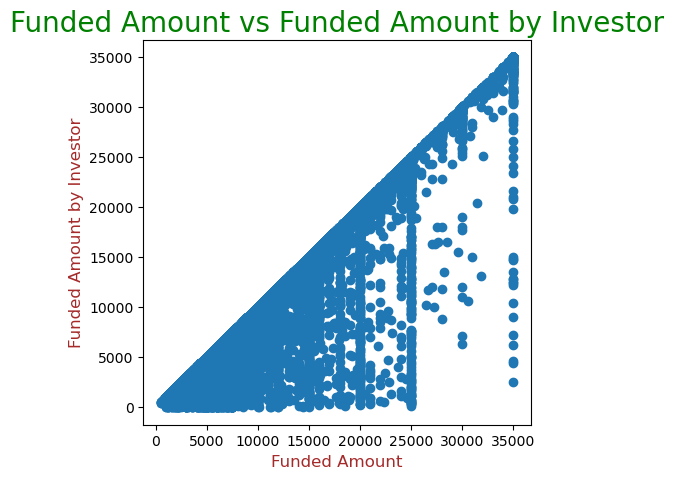

In [30]:
# Looking at above data we can see strong correl between funded_amnt and funded_amnt_inv, lets try 
# with scatter plot for these 2 variables.
plt.figure(figsize = [5,5])
plt.scatter(data = df_noncurrent , x = 'funded_amnt', y = 'funded_amnt_inv')

# Adding and formatting title
plt.title("Funded Amount vs Funded Amount by Investor", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Funded Amount by Investor", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

In [31]:
#looking at above plot we can now drop one column and only keep "funded_amnt_inv" for further analysis, reason is both of them
# are increasing in same ration and will have repeated data
df_noncurrent.drop(['funded_amnt'],inplace = True, axis = 1)


C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1552195276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['funded_amnt'],inplace = True, axis = 1)


In [32]:
#Drop grade we will use only subgrade, as subgrade will surely have grade associated with it
df_noncurrent.drop(['grade'],inplace = True, axis = 1)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\2330905305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.drop(['grade'],inplace = True, axis = 1)


In [33]:
df_noncurrent.columns

Index(['member_id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'mths_since_last_record'],
      dtype='object')

In [34]:
# Deriving new coulmns date and month of issue
df_noncurrent.issue_d = pd.to_datetime(df_noncurrent.issue_d, format='%b-%y')
df_noncurrent['year']=df_noncurrent['issue_d'].dt.year
df_noncurrent['month']=df_noncurrent['issue_d'].dt.month
df_noncurrent.head()

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1004253079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent.issue_d = pd.to_datetime(df_noncurrent.issue_d, format='%b-%y')
C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1004253079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent['year']=df_noncurrent['issue_d'].dt.year
C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1004253079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,purpose,title,zip_code,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,year,month
0,1296599,5000,4975.0,36 months,10.65%,162.87,B2,NaN,10+ years,RENT,...,credit_card,Computer,860xx,AZ,27.65,0,NaN,NaN,2011,12
1,1314167,2500,2500.0,60 months,15.27%,59.83,C4,Ryder,< 1 year,RENT,...,car,bike,309xx,GA,1.00,0,NaN,NaN,2011,12
2,1313524,2400,2400.0,36 months,15.96%,84.33,C5,NaN,10+ years,RENT,...,small_business,real estate business,606xx,IL,8.72,0,NaN,NaN,2011,12
3,1277178,10000,10000.0,36 months,13.49%,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,...,other,personel,917xx,CA,20.00,0,35.0,NaN,2011,12
5,1311441,5000,5000.0,36 months,7.90%,156.46,A4,Veolia Transportaton,3 years,RENT,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,NaN,NaN,2011,12


In [35]:
#As we are not getting interest rate in correlation, hence converting it to int

df_noncurrent['int_rate'] = df_noncurrent['int_rate'].str.rstrip('%').astype(float)

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\2919561309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent['int_rate'] = df_noncurrent['int_rate'].str.rstrip('%').astype(float)


In [36]:
# lets again see the correlation
# Find the correlation between columns
corel = df_noncurrent.corr(method='pearson')
corel.style.background_gradient(cmap='coolwarm')

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\967700035.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df_noncurrent.corr(method='pearson')


,member_id,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,year,month
member_id,1.000000,0.120393,0.241324,0.050808,0.070918,0.006442,0.092910,-0.007905,0.125311,0.719594,0.883093,0.363309
loan_amnt,0.120393,1.000000,0.937922,0.301265,0.932260,0.268999,0.062436,-0.031951,0.015440,-0.000769,0.109814,0.051902
funded_amnt_inv,0.241324,0.937922,1.000000,0.297473,0.905464,0.251981,0.070663,-0.038171,0.073367,0.439521,0.252332,0.068091
int_rate,0.050808,0.301265,0.297473,1.000000,0.277203,0.048899,0.110913,0.158479,-0.054307,0.325035,0.039417,0.025285
installment,0.070918,0.932260,0.905464,0.277203,1.000000,0.267842,0.052038,-0.019755,0.000268,-0.064267,0.053066,0.029439
annual_inc,0.006442,0.268999,0.251981,0.048899,0.267842,1.000000,-0.121530,0.022229,-0.007442,-0.031553,0.008558,0.008980
dti,0.092910,0.062436,0.070663,0.110913,0.052038,-0.121530,1.000000,-0.033347,0.068705,0.186637,0.092857,0.014197
delinq_2yrs,-0.007905,-0.031951,-0.038171,0.158479,-0.019755,0.022229,-0.033347,1.000000,-0.567607,-0.037365,-0.003145,-0.011283
mths_since_last_delinq,0.125311,0.015440,0.073367,-0.054307,0.000268,-0.007442,0.068705,-0.567607,1.000000,0.485261,0.139112,0.053102
mths_since_last_record,0.719594,-0.000769,0.439521,0.325035,-0.064267,-0.031553,0.186637,-0.037365,0.485261,1.000000,0.754111,0.215296


count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<Axes: >

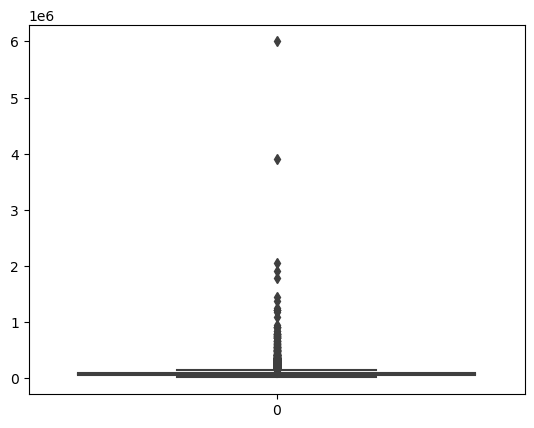

In [37]:
# Analyse loan_amt variable | visualize the data | Univariate analysis
print(df_noncurrent.annual_inc.describe())
sns.boxplot(df_noncurrent.annual_inc)

In [38]:
# We see big range of outliers, hence will remove it
# Remove Outliers quantile .99 from Annual Income
q_hi  = df_noncurrent["annual_inc"].quantile(0.99)
df_noncurrent_new = df_noncurrent[(df_noncurrent["annual_inc"] < q_hi)]
df_noncurrent_new.rename({"Unnamed: 0":"Index"}, axis="columns", inplace=True)
df_noncurrent_new.head()

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\558313975.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent_new.rename({"Unnamed: 0":"Index"}, axis="columns", inplace=True)


,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,purpose,title,zip_code,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,year,month
0,1296599,5000,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,...,credit_card,Computer,860xx,AZ,27.65,0,NaN,NaN,2011,12
1,1314167,2500,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,...,car,bike,309xx,GA,1.00,0,NaN,NaN,2011,12
2,1313524,2400,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,...,small_business,real estate business,606xx,IL,8.72,0,NaN,NaN,2011,12
3,1277178,10000,10000.0,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,...,other,personel,917xx,CA,20.00,0,35.0,NaN,2011,12
5,1311441,5000,5000.0,36 months,7.90,156.46,A4,Veolia Transportaton,3 years,RENT,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,NaN,NaN,2011,12


In [39]:

# Remove Outliers quantile .99 from Annual Income
#q_hi  = df_noncurrent_withograde["annual_inc"].quantile(0.99)
#df_noncurrent_withograde_new = df_noncurrent_withograde[(df_noncurrent_withograde["annual_inc"] < q_hi)]
#df_noncurrent_withograde_new.rename({"Unnamed: 0":"Index"}, axis="columns", inplace=True)
#df_noncurrent_withograde_new.head()

In [40]:
df_noncurrent_new

,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,purpose,title,zip_code,addr_state,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,year,month
0,1296599,5000,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,...,credit_card,Computer,860xx,AZ,27.65,0,NaN,NaN,2011,12
1,1314167,2500,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,...,car,bike,309xx,GA,1.00,0,NaN,NaN,2011,12
2,1313524,2400,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,...,small_business,real estate business,606xx,IL,8.72,0,NaN,NaN,2011,12
3,1277178,10000,10000.0,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,...,other,personel,917xx,CA,20.00,0,35.0,NaN,2011,12
5,1311441,5000,5000.0,36 months,7.90,156.46,A4,Veolia Transportaton,3 years,RENT,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,NaN,NaN,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,1075.0,36 months,8.07,78.42,A4,FiSite Research,4 years,MORTGAGE,...,home_improvement,Home Improvement,802xx,CO,11.33,0,0.0,0.0,2007,7
39713,90607,8500,875.0,36 months,10.28,275.38,C1,"Squarewave Solutions, Ltd.",3 years,RENT,...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,5.0,0.0,2007,7
39714,90390,5000,1325.0,36 months,8.07,156.84,A4,NaN,< 1 year,MORTGAGE,...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,0.0,0.0,2007,7
39715,89243,5000,650.0,36 months,7.43,155.38,A2,NaN,< 1 year,MORTGAGE,...,other,JAL Loan,208xx,MD,3.72,0,0.0,0.0,2007,7


In [41]:
#df_noncurrent_withograde_new

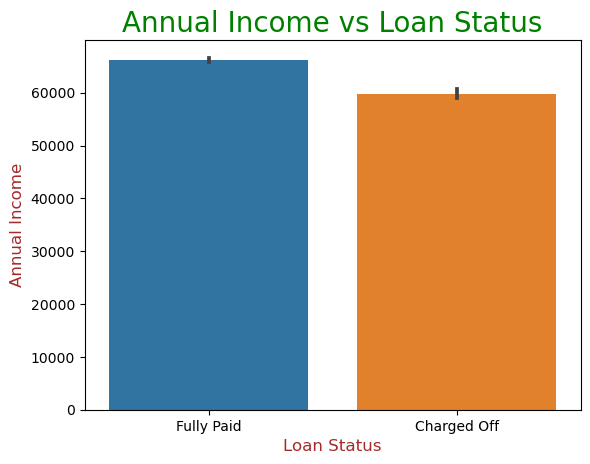

In [42]:
# Visualize the data of annual income
sns.barplot(x=df_noncurrent_new.loan_status, y=df_noncurrent_new.annual_inc)

# Adding and formatting title
plt.title("Annual Income vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

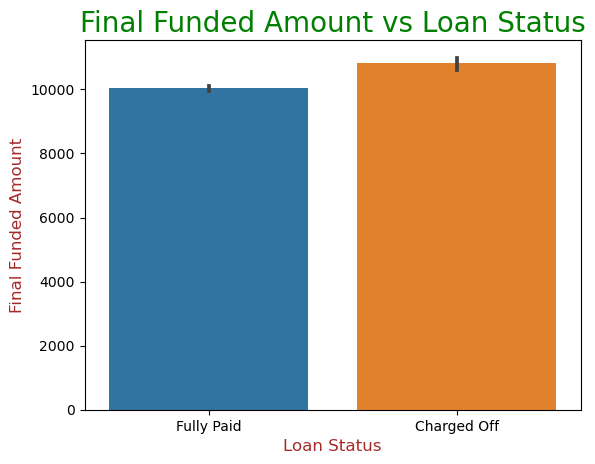

In [43]:
# Visualize the data of annual income
sns.barplot(x=df_noncurrent_new.loan_status, y=df_noncurrent_new.funded_amnt_inv)

# Adding and formatting title
plt.title("Final Funded Amount vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Final Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

In [44]:
# Analyse Intereset rate, int_rate
print(df_noncurrent_new.int_rate.describe())

#sns.boxplot(df.int_rate)
# we can not plot Error says: could not convert string to float: '10.65%'. Lets convert str to int
#df_noncurrent_new['int_rate'] = df_noncurrent_new['int_rate'].str.rstrip('%')

df_noncurrent_new['int_rate'] = df_noncurrent_new['int_rate'].str.rstrip('%').astype(float)
sns.boxplot(df_noncurrent_new.int_rate)

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64


AttributeError: Can only use .str accessor with string values!

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\1999885321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noncurrent_new['emplength'] = df_noncurrent_new['emp_length'].str.strip('< + years')


<Axes: >

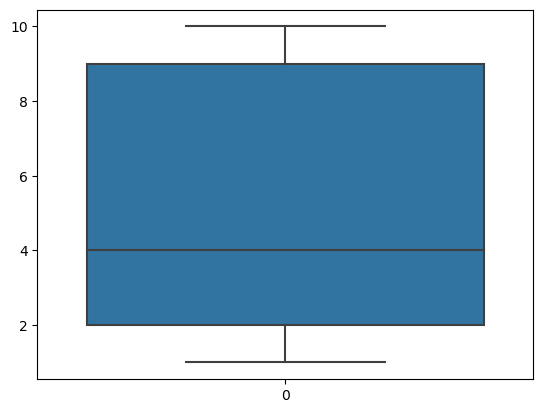

In [47]:
# Create new variable for employee length
df_noncurrent_new['emplength'] = df_noncurrent_new['emp_length'].str.strip('< + years')
#df_noncurrent_new['emplength'] = df_noncurrent_new['emp_length'].str.rstrip('+')
df_noncurrent_new.emplength
#df_noncurrent_new['emplength'] = df_noncurrent_new['emp_length'].str.rstrip('years').astype(int)
sns.boxplot(df_noncurrent_new.emplength)

In [48]:
# Lets create data only for fully paid borrowers
df_full_paid = df_noncurrent_new[(df_noncurrent_new['loan_status'] == 'Fully Paid')]
df_full_paid.loan_status


0        Fully Paid
2        Fully Paid
3        Fully Paid
5        Fully Paid
6        Fully Paid
            ...    
39712    Fully Paid
39713    Fully Paid
39714    Fully Paid
39715    Fully Paid
39716    Fully Paid
Name: loan_status, Length: 32607, dtype: object

In [49]:
# Lets create data only for charged off borrowers
df_charged_off = df_noncurrent_new[(df_noncurrent_new['loan_status'] == 'Charged Off')]
df_charged_off.loan_status

1        Charged Off
8        Charged Off
9        Charged Off
12       Charged Off
14       Charged Off
            ...     
39667    Charged Off
39668    Charged Off
39669    Charged Off
39678    Charged Off
39688    Charged Off
Name: loan_status, Length: 5584, dtype: object

In [50]:
# Check data correlation for fully paid
corel = df_full_paid.corr(method='pearson')
corel.style.background_gradient(cmap='coolwarm')

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\3490761405.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df_full_paid.corr(method='pearson')


,member_id,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,year,month
member_id,1.000000,0.110059,0.223012,0.014672,0.067070,0.037817,0.087909,-0.011847,0.128234,0.723934,0.883252,0.356629
loan_amnt,0.110059,1.000000,0.944192,0.281660,0.933774,0.416034,0.069653,-0.038007,0.019247,0.007948,0.104303,0.047516
funded_amnt_inv,0.223012,0.944192,1.000000,0.279511,0.914077,0.396324,0.078188,-0.044326,0.074347,0.438879,0.238335,0.058799
int_rate,0.014672,0.281660,0.279511,1.000000,0.266118,0.068787,0.117745,0.163139,-0.063315,0.310465,0.007701,0.011165
installment,0.067070,0.933774,0.914077,0.266118,1.000000,0.409734,0.062713,-0.025789,0.005618,-0.044109,0.054018,0.025121
annual_inc,0.037817,0.416034,0.396324,0.068787,0.409734,1.000000,-0.113203,0.028030,-0.007947,0.010837,0.040545,0.016782
dti,0.087909,0.069653,0.078188,0.117745,0.062713,-0.113203,1.000000,-0.026246,0.065415,0.179567,0.090552,0.010031
delinq_2yrs,-0.011847,-0.038007,-0.044326,0.163139,-0.025789,0.028030,-0.026246,1.000000,-0.564037,-0.025690,-0.007806,-0.010273
mths_since_last_delinq,0.128234,0.019247,0.074347,-0.063315,0.005618,-0.007947,0.065415,-0.564037,1.000000,0.473728,0.143991,0.047522
mths_since_last_record,0.723934,0.007948,0.438879,0.310465,-0.044109,0.010837,0.179567,-0.025690,0.473728,1.000000,0.757939,0.221711


<Axes: >

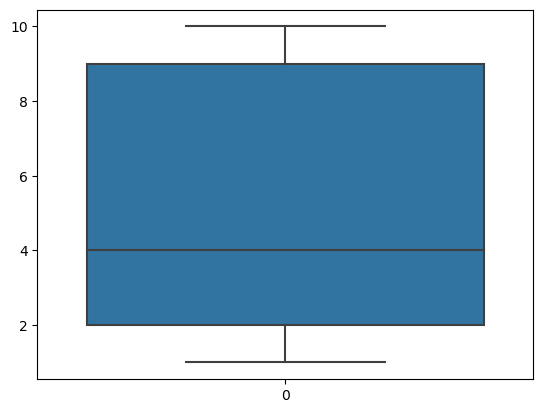

In [55]:
# Check data for Employees who paid full and what was length of borrower
sns.boxplot(df_full_paid.emplength)

{'whiskers': [<matplotlib.lines.Line2D at 0x210daba8490>,
 'caps': [<matplotlib.lines.Line2D at 0x210daba89d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210daba81f0>],
 'medians': [<matplotlib.lines.Line2D at 0x210daba8f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x210dab863b0>],
 'means': []}

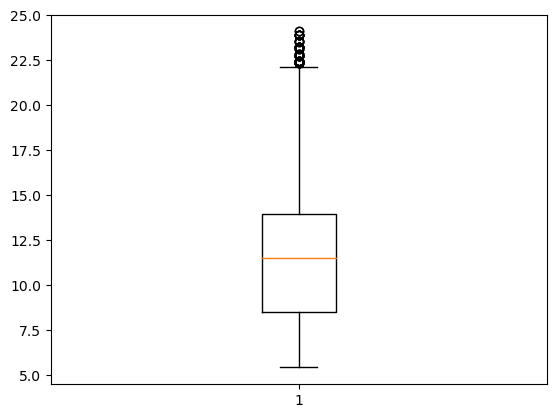

In [56]:
# Check data for Employees who paid full and what was Interest Rate of borrower
plt.boxplot(df_full_paid.int_rate)

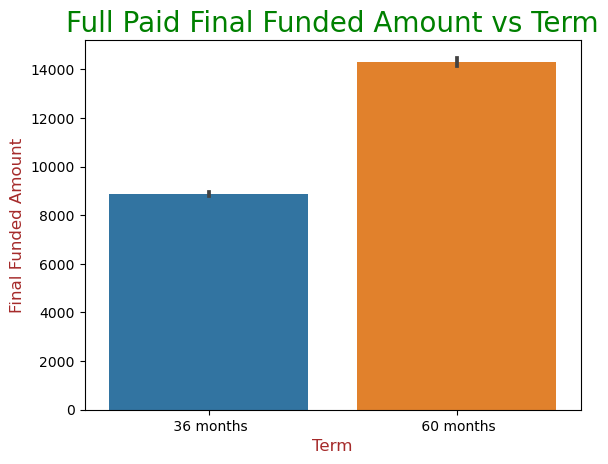

In [57]:
# Visualize the data of annual income
sns.barplot(x=df_full_paid.term, y=df_full_paid.funded_amnt_inv)

# Adding and formatting title
plt.title("Full Paid Final Funded Amount vs Term", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Final Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

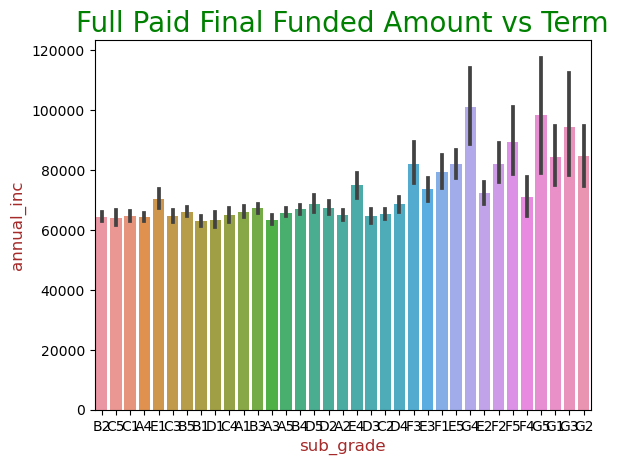

In [58]:
# Visualize the data of annual income
sns.barplot(x=df_full_paid.sub_grade, y=df_full_paid.annual_inc)

# Adding and formatting title
plt.title("Full Paid Final Funded Amount vs Term", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("sub_grade", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("annual_inc", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

In [52]:
#Get data analysis on the basis of term and funded amount for fully paid
df_full_paid.groupby(['term'])['funded_amnt_inv'].agg(lambda x: x.unique().mean()).sort_values(ascending =False)

term
 60 months    16273.248090
 36 months    10745.910359
Name: funded_amnt_inv, dtype: float64

In [53]:
df_full_paid.groupby(['term'])['funded_amnt_inv'].agg(lambda x: x.unique().mean())

term
 36 months    10745.910359
 60 months    16273.248090
Name: funded_amnt_inv, dtype: float64

In [64]:
#Check data correlation for charged Off data
corel = df_charged_off.corr(method='pearson')
corel.style.background_gradient(cmap='coolwarm')

C:\Users\I061381\AppData\Local\Temp\ipykernel_43840\4294406518.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = df_charged_off.corr(method='pearson')


,member_id,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,year,month
member_id,1.000000,0.149556,0.320303,0.195826,0.074134,0.005623,0.107337,0.002531,0.114588,0.694924,0.881862,0.398611
loan_amnt,0.149556,1.000000,0.907250,0.349623,0.926070,0.453498,0.068173,-0.029205,0.013929,-0.040620,0.119595,0.069294
funded_amnt_inv,0.320303,0.907250,1.000000,0.367916,0.858102,0.405551,0.076279,-0.031707,0.083573,0.443927,0.314300,0.114403
int_rate,0.195826,0.349623,0.367916,1.000000,0.326526,0.166791,0.041724,0.119349,-0.019920,0.347507,0.179229,0.079279
installment,0.074134,0.926070,0.858102,0.326526,1.000000,0.452031,0.047803,-0.012404,-0.006800,-0.142493,0.030197,0.052901
annual_inc,0.005623,0.453498,0.405551,0.166791,0.452031,1.000000,-0.055889,0.029778,-0.017834,-0.013275,-0.004733,0.018025
dti,0.107337,0.068173,0.076279,0.041724,0.047803,-0.055889,1.000000,-0.068889,0.072286,0.173279,0.094825,0.037199
delinq_2yrs,0.002531,-0.029205,-0.031707,0.119349,-0.012404,0.029778,-0.068889,1.000000,-0.583238,-0.079202,0.012444,-0.020103
mths_since_last_delinq,0.114588,0.013929,0.083573,-0.019920,-0.006800,-0.017834,0.072286,-0.583238,1.000000,0.506292,0.117899,0.082076
mths_since_last_record,0.694924,-0.040620,0.443927,0.347507,-0.142493,-0.013275,0.173279,-0.079202,0.506292,1.000000,0.730672,0.181040


In [55]:
df_charged_off.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record'],
      dtype='object')

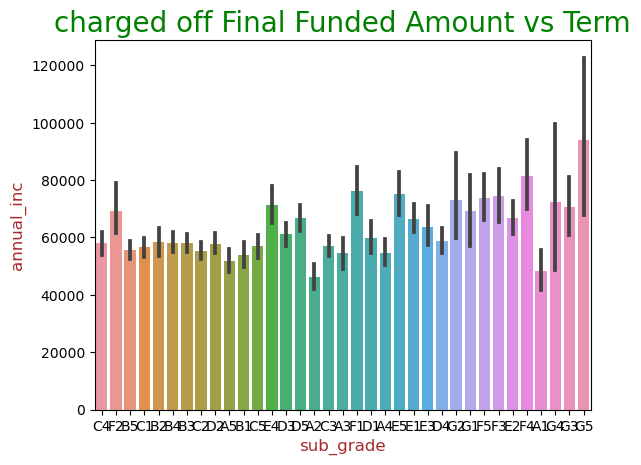

In [78]:
# Visualize the data of annual income for charged off
sns.barplot(x=df_charged_off.sub_grade, y=df_charged_off.annual_inc)

# Adding and formatting title
plt.title("charged off Final Funded Amount vs Term", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("sub_grade", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("annual_inc", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

In [40]:
#Analysis data for charged off term
df_charged_off.groupby(['term'])['funded_amnt_inv'].agg(lambda x: x.unique().mean())

term
 36 months     9215.794236
 60 months    15920.842585
Name: funded_amnt_inv, dtype: float64

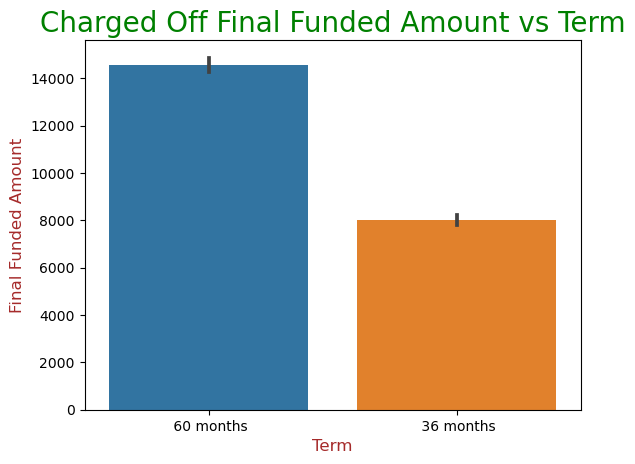

In [41]:
# Visualize the data of annual income
sns.barplot(x=df_charged_off.term, y=df_charged_off.funded_amnt_inv)

# Adding and formatting title
plt.title("Charged Off Final Funded Amount vs Term", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Final Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

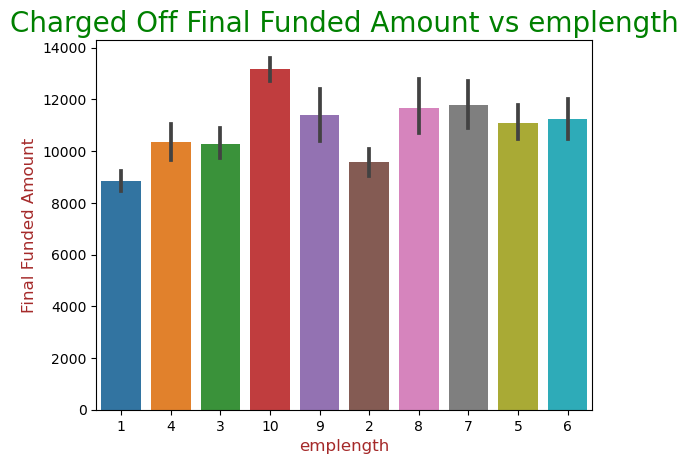

In [42]:
# Visualize the data of annual income
sns.barplot(x=df_charged_off.emplength, y=df_charged_off.funded_amnt_inv)

# Adding and formatting title
plt.title("Charged Off Final Funded Amount vs emplength", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("emplength", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Final Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

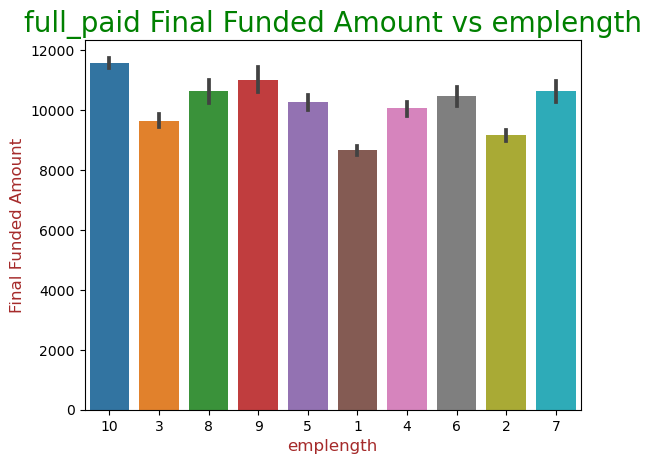

In [91]:
# Visualize the data of annual income for full paid
sns.barplot(x=df_full_paid.emplength, y=df_full_paid.funded_amnt_inv)

# Adding and formatting title
plt.title("full_paid Final Funded Amount vs emplength", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("emplength", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Final Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

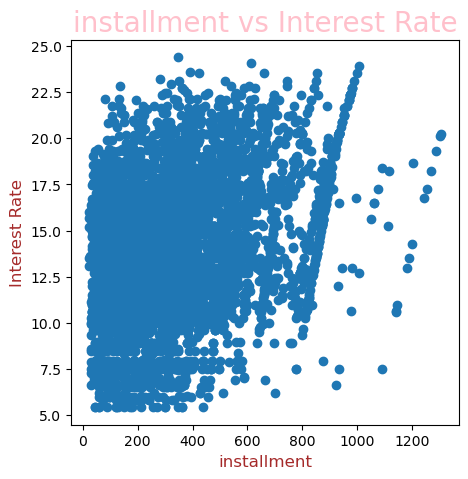

In [261]:
# Looking at above data we can see strong correl between funded_amnt and funded_amnt_inv, lets try 
# with scatter plot for these 2 variables
plt.figure(figsize = [5,5])
plt.scatter(data = df_charged_off , x = 'installment', y = 'int_rate')

# Adding and formatting title
plt.title("installment vs Interest Rate", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Pink'})

# Labeling Axes
plt.xlabel("installment", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.show()

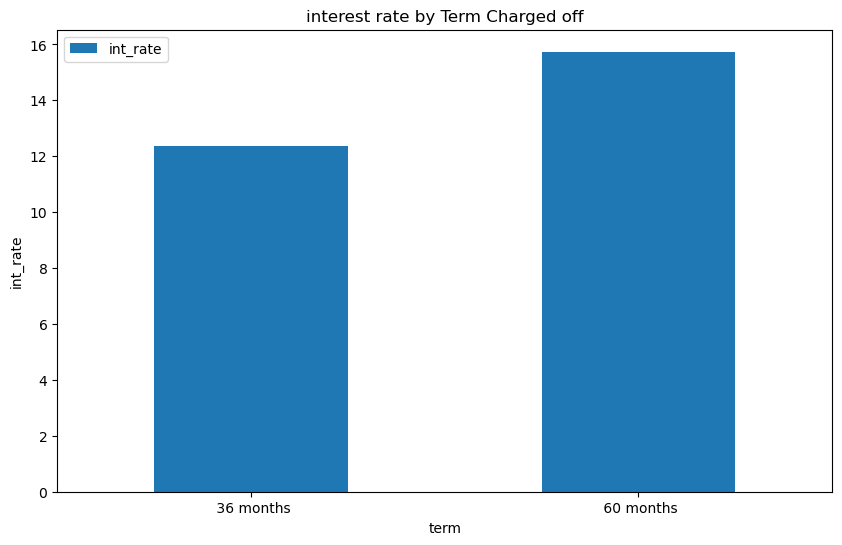

In [57]:
average_loan = df_charged_off.groupby('term')['int_rate'].mean()

plt.figure(figsize=(10, 6))
average_loan.plot(kind='bar')
plt.xlabel('term')
plt.ylabel('int_rate')
plt.title('interest rate by Term Charged off')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

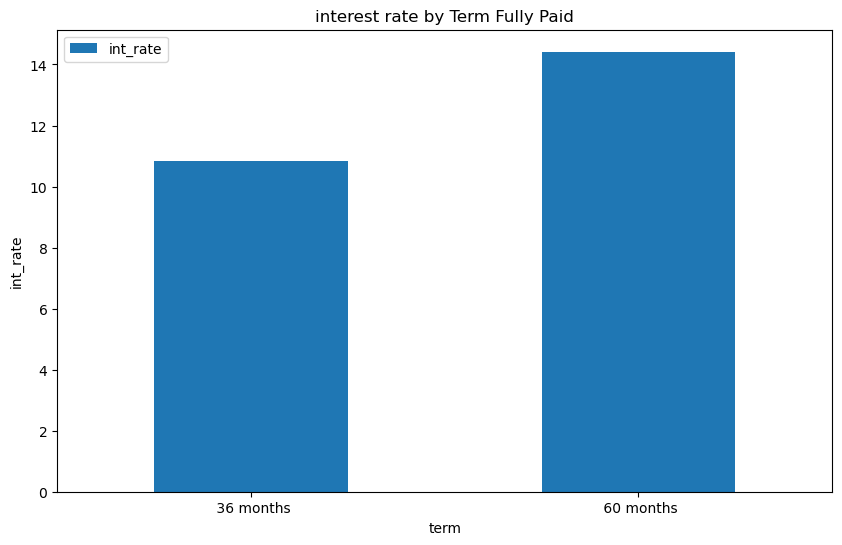

In [56]:
average_loan = df_full_paid.groupby('term')['int_rate'].mean()

plt.figure(figsize=(10, 6))
average_loan.plot(kind='bar')
plt.xlabel('term')
plt.ylabel('int_rate')
plt.title('interest rate by Term Fully Paid')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='year', ylabel='int_rate'>

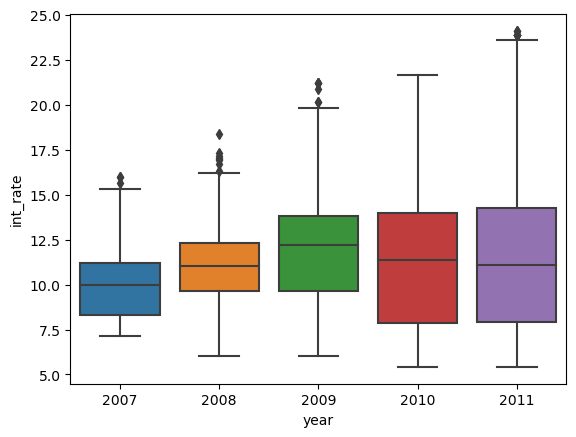

In [68]:
# Bivariate Analysis, year vs interest rate using box plot on fully paid dataset

sns.boxplot(y='int_rate', x='year', data =df_full_paid)

<Axes: xlabel='year', ylabel='int_rate'>

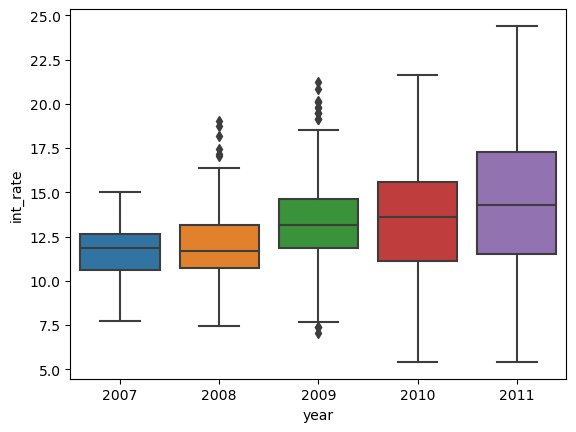

In [69]:
# Bivariate Analysis, year vs interest rate using box plot on charged off dataset

sns.boxplot(y='int_rate', x='year', data =df_charged_off)

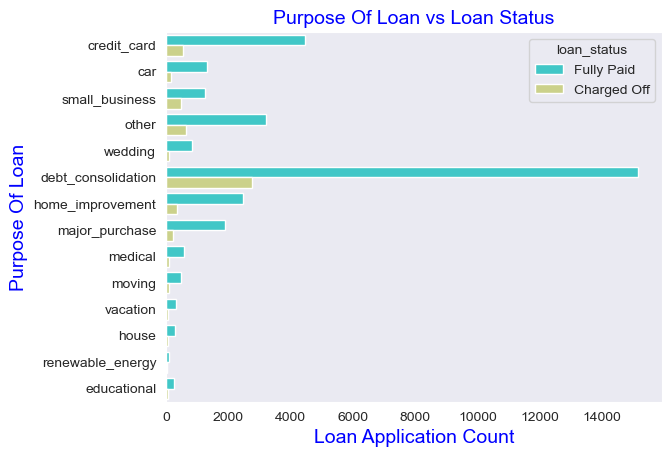

In [70]:
# Bi Variate Analysis: purpose of loan vs loan status
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_noncurrent_new,hue='loan_status',palette='rainbow')
ax.set_title('Purpose Of Loan vs Loan Status',fontsize=14,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

<Axes: xlabel='loan_status', ylabel='dti'>

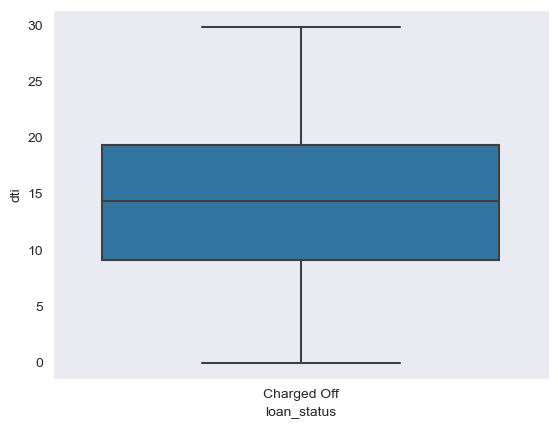

In [81]:
# Analysing dti vs loan status on different loan status dataset.
# Observation: There is slight difference in dti in both scenario. In charged off its little more, meaning if dti is more
# it tesnd to charged off more
sns.boxplot(y='dti', x='loan_status', data =df_charged_off)

<Axes: xlabel='loan_status', ylabel='dti'>

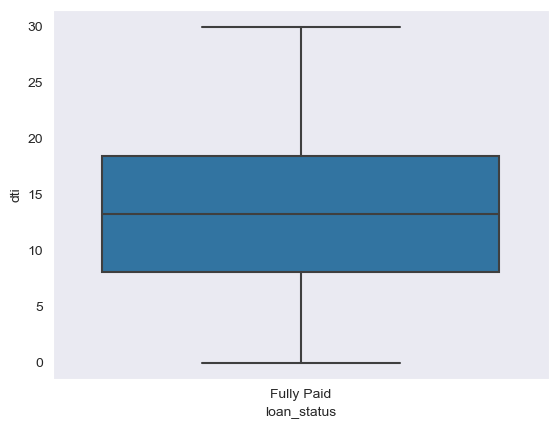

In [84]:
sns.boxplot(y='dti', x='loan_status', data =df_full_paid)